In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import datetime
import numpy as np

from pandas.io.json import json_normalize

%matplotlib inline


def instagram_scraper(query):
    
    client_id = '768fcf1f36c94eb08506bae0a9caffa3'
    secret = '54efcbaed7f64673bc93b4e28ca9e8b2'
    base_url = "https://api.instagram.com/v1"

    url = '{0}/tags/{1}/media/recent?client_id={2}&count=20'.format(base_url, query, client_id)
    

    df = json_normalize(requests.get(url).json()['data'])
    df = df[['user.username','caption.text','tags','comments.count','likes.count',
             'filter','type','created_time','user.full_name','user.id','link','location.latitude',
             'location.longitude']]
    df['created_time'] = [x.replace(x, datetime.datetime.fromtimestamp(int(str(x))).strftime('%Y-%m-%d %H:%M:%S')) for x in df['created_time']]
    df = df.rename(columns=lambda x: x.replace('.', ' ').title())
    
    return df
    

In [2]:
instagram_scraped = instagram_scraper('ditmaspark')

In [3]:
instagram_scraped

,User Username,Caption Text,Tags,Comments Count,Likes Count,Filter,Type,Created_Time,User Full_Name,User Id,Link,Location Latitude,Location Longitude
0,hamiltonsbrooklyn,Game ON!,"[todiefor, windsorterrace, foodie, foodporn, f...",1,5,Normal,image,2015-05-29 19:06:12,Hamilton's Restaurant & Bar,964825506,https://instagram.com/p/3SJ3L9B-3E/,40.648573,-73.977245
1,lavenderbluesmusic,SATURDAYS at @LARKCafe!! The most BRILLIANT wa...,"[sofun, windsorterrace, singalong, missalex, b...",0,2,Normal,image,2015-05-29 19:03:25,Lavender Blues,598157192,https://instagram.com/p/3SJivSIkSL/,40.677468,-73.922337
2,mfheadliner,#ditmaspark #roses #freshcut #ny #nyc #latergr...,"[ny, freshcut, unedited, ditmaspark, roses, br...",0,9,Normal,image,2015-05-29 18:55:03,Chris Turck Photography,407807781,https://instagram.com/p/3SIlgOK3qM/,40.640178,-73.967199
3,kaponithebarber,Haciendo algo JuniorBarberShop📍🇺🇸#Barber #...,"[nastybarber, flatbush, niceline, brooklyn, br...",0,27,Normal,image,2015-05-29 18:39:35,Anthony Ureña,1544032220,https://instagram.com/p/3SG0KcIrYm/,40.641977,-73.962930
4,ilegalmezcal,See you @barchordbrooklyn for the @ilegalmezca...,"[brooklyn, music, ditmaspark, mezcal]",0,36,Normal,image,2015-05-29 18:31:52,ilegalmezcal,11783998,https://instagram.com/p/3SF7rqvn1t/,40.639153,-73.968396
5,sherrydavisart,Constructing a #pop-up city! #DitmasPark #kens...,"[ezraguitar, brooklyn, ditmaspark, pop, kensin...",0,1,Normal,image,2015-05-29 18:17:48,Sherry Davis,1586184757,https://instagram.com/p/3SEUnxSlrK/,40.638305,-73.968196
6,coffeemob,Anodyne: A pain killing drug or medicine. I al...,"[cappuccino, scaa, coffeemug, brooklynsbest, a...",4,61,Normal,image,2015-05-29 17:26:04,Buck,281117237,https://instagram.com/p/3R-Zsuovru/,40.635658,-73.962737
7,hamiltonsbrooklyn,Homemade potato gnudi with stinging nettle pes...,"[todiefor, windsorterrace, foodie, foodporn, f...",1,9,Normal,image,2015-05-29 16:56:04,Hamilton's Restaurant & Bar,964825506,https://instagram.com/p/3R69_eh-9H/,40.648573,-73.977245
8,uncleshackgrill,CONGRATULATIONS #CLASSOF2015 #FAMILY #SEAFOOD...,"[classof2015, family, foodporn, fish, goodfood...",1,20,Ludwig,image,2015-05-29 15:24:33,Uncle's Shack & Grill,1196814960,https://instagram.com/p/3Rwfx7TYem/,40.642547,-73.951600
9,followurblis,NEW POST: Click the link in my bio to read abo...,"[albany, careernomad, muktiskitchen, cooking, ...",0,9,Normal,image,2015-05-29 15:19:01,Marguerite L. Pierce,1002363483,https://instagram.com/p/3Rv3QSNnDc/,NaN,NaN


In [20]:
def instagram_graph(instagram_scraped):

    fig = plt.figure(figsize=(8,6))

    ax1 = plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
    instagram_scraped['Comments Count'].plot(kind='bar', alpha=.55)
    plt.title("Total Comment Count Per Post",fontsize=20)
    plt.ylabel('Total Comments')
    plt.xlabel('Most Recent to Least Recent')


    ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=1)
    instagram_scraped['Likes Count'].plot(kind='bar', alpha=.55)
    plt.title("Total Like Count Per Post",fontsize=20)
    plt.xlabel('Most Recent to Least Recent')
    plt.ylabel('Total Likes')
    
    
    ax3 = plt.subplot2grid((3,3), (2,0), colspan=3, rowspan=1)
    plt.hist(instagram_scraped['Likes Count'])
    plt.title('Test Graph (Please Ignore)', fontsize=20)
    plt.xlabel('Amount of Posts')
    plt.ylabel('Likes')
    fig_size = plt.rcParams["figure.figsize"]
    

    fig.tight_layout()

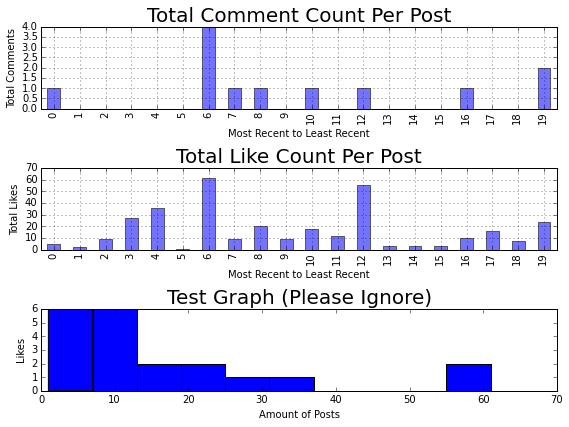

In [21]:
instagram_graph(instagram_scraped)

#gmaps

In [4]:
df = df.dropna()

In [5]:
df = df[['Location Latitude', 'Location Longitude']]

In [6]:
df

,Location Latitude,Location Longitude
4,40.752261,-73.999900
5,40.729432,-73.951760
7,55.405831,10.410362
8,39.391243,-76.710414
10,40.779655,-73.962478
11,40.750734,-73.938787
13,21.800650,-72.171433
15,40.730892,-73.997475
18,40.705576,-74.013421


In [7]:
df_array = np.array(df.as_matrix(columns = None)).astype(np.float)

In [8]:
df_array

array([[ 40.752261  , -73.9999    ],
       [ 40.72943211, -73.95176042],
       [ 55.40583139,  10.41036239],
       [ 39.39124266, -76.71041398],
       [ 40.779655  , -73.96247833],
       [ 40.7507344 , -73.93878717],
       [ 21.80065   , -72.17143333],
       [ 40.7308923 , -73.99747521],
       [ 40.705576  , -74.013421  ]])

In [25]:
import gmaps
import matplotlib as plt
from gmaps import Geocoding

In [31]:
import gmaps
data = gmaps.datasets.load_dataset('taxi_rides')

AttributeError: 'module' object has no attribute 'datasets'

In [27]:
import gmaps

In [30]:
gmaps.Geocoding.

(0, 2, 1)

In [10]:
type(df_array)

numpy.ndarray

In [15]:
map = gmaps.heatmap(df_array)

In [21]:
gmaps.display(map)


AttributeError: 'module' object has no attribute 'display'

In [85]:
from twitter import *
import nltk
import matplotlib.pyplot as plt
import numpy as np



api = Twitter(
    auth=OAuth(
        token=['322803973-DMGKZNX8SXRf3LLrLAwiug2PEMgruNECqbbAbN1d'],
        token_secret=['y4noOkMH4D74QNcaWazFNxRBVRilGc9P79r3OrjtwVcxF'],
        consumer_key=['5uC13nn4MAPcQzFuMgWPeVL1Bvs8wj3Cd1puauCUD4F1zqpR1q'],
        consumer_secret=['sT8FcSnqen19WZ9ew6EwzLAUe'])
    )


# Getting argument from user's command line input
if __name__ == "__main__":
    import sys
    username = sys.argv[1]
    if len(sys.argv) > 2:
    	numberOfTweet = sys.argv[2]
    else:
    	numberOfTweet = 100 # default number of tweets

# Function to fetch user's timeline data
def fetchTweet(user):
	numbers = numberOfTweet
	statuses = api.GetUserTimeline(screen_name = user, count = numbers)

	tweet = ""
	for s in statuses:
	    tweet = tweet + s.text
	return tweet

# Fetch the user's timeline
tweets = fetchTweet('odubno')

# Define dictionary for feeling, I need to insert more words to make it more interesting
feelingCount = {'positive': 0, 'happy': 0, 'lovely': 0, 'negative': 0, 'sad': 0, 'angry': 0, 'sick': 0}
feelingWords = {}

feelingWords['positive'] = [
'excellent', 'amazing', 'beautiful', 'nice', 'marvelous', 'magnificent', 'fabulous', 'astonishing', 'fantastic', 'peaceful', 'fortunate',
'brilliant', 'glorious', 'cheerful', 'gracious', 'grateful', 'splendid', 'superb', 'honorable', 'thankful', 'inspirational',
'ecstatic', 'victorious', 'virtuous', 'proud', 'wonderful', 'lovely', 'delightful']

feelingWords['happy'] = [
'happy', 'lucky', 'awesome', 'excited', 'fun', 'amusing', 'amused', 'pleasant', 'pleasing', 'glad', 'enjoy',
'jolly', 'delightful', 'joyful', 'joyous', ':-)', ':)', ':-D', ':D', '=)']

feelingWords['lovely'] = [
'love', 'adore', 'blissful', 'heartfelt', 'loving', 'lovable', 'sweetheart', 'darling', 'kawaii', 'married', 'engaged']

feelingWords['negative'] = [
'unhappy', 'bad', 'sorry', 'annoyed', 'dislike', 'anxious', 'ashamed', 'cranky', 'crap', 'crappy', 'envy',
'awful', 'bored', 'boring', 'bothersome', 'bummed', 'burned', 'chaotic', 'defeated', 'devastated', 'stressed',
'disconnected', 'discouraged', 'dishonest', 'doomed', 'dreadful', 'embarrassed', 'evicted', 'freaked out', 'frustrated', 'stupid',
'guilty', 'hopeless', 'horrible', 'horrified', 'humiliated', 'ignorant', 'inhumane', 'cruel', 'insane', 'insecure',
'nervous', 'offended', 'oppressed', 'overwhelmed', 'pathetic', 'powerless', 'poor', 'resentful', 'robbed', 'screwed']

feelingWords['sad'] = [
'sad', 'alone', 'anxious', 'depressed', 'disappointed', 'disappointing', 'sigh', 'sobbing', 'crying', 'cried',
'dumped', 'heartbroken', 'helpless', 'hurt', 'miserable', 'misunderstood', 'suicidal', ':-(', ':(', '=(', ';(']

feelingWords['angry'] = [
'hate', 'damn', 'angry', 'betrayed', 'bitched','disgust', 'disturbed', 'furious', 'harassed', 'hateful', 'hostile', 'insulted',
'irritable', 'jealous', ' rage ', 'pissed']

feelingWords['sick'] = [
'sick', ' ill ', 'under weather', 'throw up', 'threw up', 'throwing up', 'puke', 'puking', 'pain', 'hangover', 'intoxicated']

# Analyze feeling from user's most recent tweets
# NLTK library is used
for words in feelingWords:
    for feel in feelingWords[words]:
        if tweets.find(feel) > 0:
            if words == 'positive':
                feelingCount['positive'] = feelingCount['positive'] + 1
            elif words == 'happy':
                feelingCount['happy'] = feelingCount['happy'] + 1
            elif words == 'lovely':
                feelingCount['lovely'] = feelingCount['lovely'] + 1
            elif words == 'negative':
                feelingCount['negative'] = feelingCount['negative'] + 1
            elif words == 'sad':
                feelingCount['sad'] = feelingCount['sad'] + 1
            elif words == 'angry':
                feelingCount['angry'] = feelingCount['angry'] + 1
            elif words == 'sick':
                feelingCount['sick'] = feelingCount['sick'] + 1

# matplotlib is used to plot user's feeling
y_pos = np.arange(len(feelingCount.keys()))
emotion = feelingCount.values()

plt.barh(y_pos, emotion, align='center', alpha=0.4)
plt.yticks(y_pos, feelingCount.keys())
plt.xlabel('Emotion level')
plt.title('Analyzing @' + sys.argv[1] + '\'s feeling from ' + str(numberOfTweet) + ' recent tweets')

# Show the plotted feeling
plt.show()

TypeError: can only concatenate list (not "str") to list